# Read the Data

In [7]:
import os
import json
from pprint import pprint

### READ THE DATA
DATA_DIR = os.path.join('project_1', 'data','boxofficemojo') 
movies = []
for movie_file_name in os.listdir(DATA_DIR):
    movie_path = os.path.join(DATA_DIR, movie_file_name)
    with open(movie_path, 'r') as infile:
        movies.append(json.load(infile))

import project_1.loaddata
movies = project_1.loaddata.get_boxofficemojo_movies()

print len(movies)
pprint(movies[:3])

Parsed 3728 movies from 3728 files
3728
[{u'alt_title': u'10,000 B.C. (2008)',
  u'director': u'Roland Emmerich',
  u'domestic_gross': 94784201,
  u'mojo_slug': u'10000bc',
  u'opening_per_theater': 10518,
  u'opening_weekend_take': 35867488,
  u'production_budget': 105000000,
  u'release_date_limited': None,
  u'release_date_wide': u'2008-03-07',
  u'title': u'10,000 B.C.',
  u'widest_release': 3454,
  u'worldwide_gross': 269784201,
  u'year': 2008},
 {u'alt_title': u'102 Dalmatians (2000)',
  u'director': None,
  u'domestic_gross': 66957026,
  u'mojo_slug': u'102dalmatians',
  u'opening_per_theater': 7353,
  u'opening_weekend_take': 19883351,
  u'production_budget': 85000000,
  u'release_date_limited': None,
  u'release_date_wide': u'2000-11-22',
  u'title': u'102 Dalmatians ',
  u'widest_release': 2704,
  u'worldwide_gross': 183611771,
  u'year': 2000},
 {u'alt_title': u'10 Things I Hate About You (1999)',
  u'director': None,
  u'domestic_gross': 38178166,
  u'mojo_slug': u'10thing

# Exploratory Data Analysis (EDA)

### What years are the movies from?

In [14]:
# A list comprehension: http://www.diveintopython.net/native_data_types/mapping_lists.html
#years = []
#for movie in movies:
#    years.append(movie['year'])

years = [movie['year'] for movie in movies]
#print years


# https://docs.python.org/2/library/collections.html#collections.Counter
from collections import Counter

year_counter = Counter()
for year in years:
    year_counter[year] += 1
    
#print year_counter
print year_counter.most_common(5)    

year_dict = dict(year_counter)
pprint(year_dict)


[(2013, 308), (2014, 280), (2011, 264), (2012, 257), (2010, 209)]
{None: 7,
 1933: 1,
 1936: 1,
 1937: 1,
 1940: 1,
 1946: 1,
 1950: 1,
 1951: 3,
 1953: 1,
 1956: 2,
 1959: 1,
 1960: 1,
 1964: 1,
 1967: 2,
 1968: 2,
 1969: 4,
 1970: 6,
 1971: 2,
 1972: 4,
 1974: 4,
 1975: 3,
 1976: 6,
 1977: 4,
 1978: 6,
 1979: 9,
 1980: 14,
 1981: 12,
 1982: 18,
 1983: 19,
 1984: 17,
 1985: 13,
 1986: 21,
 1987: 27,
 1988: 31,
 1989: 29,
 1990: 24,
 1991: 24,
 1992: 28,
 1993: 39,
 1994: 30,
 1995: 51,
 1996: 52,
 1997: 74,
 1998: 84,
 1999: 106,
 2000: 99,
 2001: 108,
 2002: 132,
 2003: 146,
 2004: 161,
 2005: 164,
 2006: 184,
 2007: 190,
 2008: 194,
 2009: 192,
 2010: 209,
 2011: 264,
 2012: 257,
 2013: 308,
 2014: 280,
 2015: 53}


Let's check out the whole distribution

Ok, looking at this is like looking at a histogram. (By the way we have 7 None values.) We get a general sense, 

### but let's make a real histogram
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns

(array([  4.00000000e+00,   1.00000000e+00,   7.00000000e+00,
          3.00000000e+00,   2.00000000e+01,   7.60000000e+01,
          1.81000000e+02,   3.82000000e+02,   1.10000000e+03,
          1.94700000e+03]),
 array([ 1933. ,  1941.2,  1949.4,  1957.6,  1965.8,  1974. ,  1982.2,
         1990.4,  1998.6,  2006.8,  2015. ]),
 <a list of 10 Patch objects>)

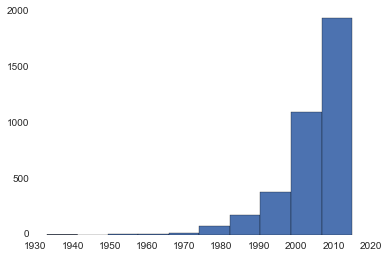

In [18]:
years = [movie['year'] for movie in movies if movie['year']]
plt.hist(years)

Whoa! What just happened? We have a weird error. Hmm. It says NoneType in the error. Remember those None values, perhaps they are causing this. Let's remove them and try again.

In [21]:
years = [movie['year'] for movie in movies]
years_clean = [movie['year'] for movie in movies if movie['year']]

print len(years), len(years_clean)

3728 3721


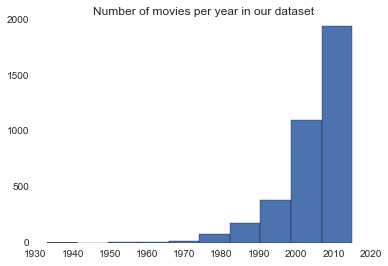

In [22]:
year_histogram = plt.hist(years_clean)
title = plt.title("Number of movies per year in our dataset")

Let's look at something else, what do we have?

In [23]:
movies[0].keys()

[u'opening_weekend_take',
 u'release_date_limited',
 u'title',
 u'widest_release',
 u'alt_title',
 u'mojo_slug',
 u'worldwide_gross',
 u'director',
 u'production_budget',
 u'year',
 u'release_date_wide',
 u'opening_per_theater',
 u'domestic_gross']

In [24]:
domestic_gross_numbers = [movie['domestic_gross'] for movie in movies \
                          if movie['domestic_gross']]
print domestic_gross_numbers[:5]

[94784201, 66957026, 38178166, 203373, 9213]


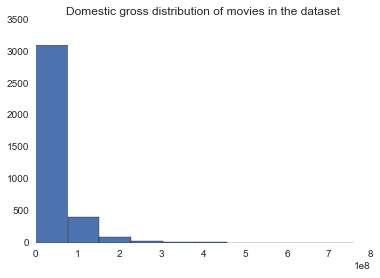

In [25]:
gross_histogram = plt.hist(domestic_gross_numbers)
title = plt.title("Domestic gross distribution of movies in the dataset")

Can't really see. Super low gross movies dominate. We can see better if we use log scale and look at log(gross) instead

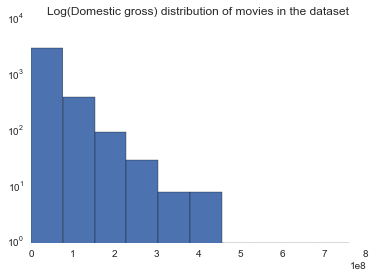

In [26]:
gross_histogram = plt.hist(domestic_gross_numbers, log=True)
title = plt.title("Log(Domestic gross) distribution of movies in the dataset")

How about the length of their names?

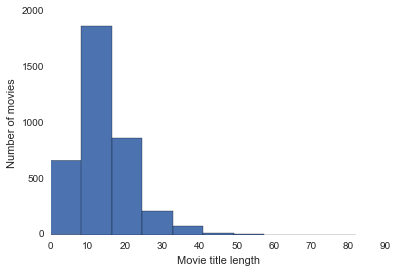

In [27]:
title_lengths = [len(movie['title']) for movie in movies]
plt.hist(title_lengths)
plt.xlabel("Movie title length")
plt.ylabel("Number of movies")

Now let's do this with pandas

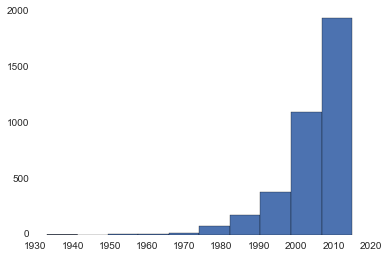

In [29]:
import pandas as pd

movies_df = pd.DataFrame(movies)
movies_df['year'].hist()

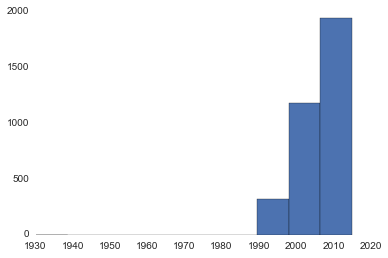

In [31]:
recent_movies = movies_df[ movies_df['year'] >= 1990 ]
recent_movies['year'].hist(range=(1930, 2015))


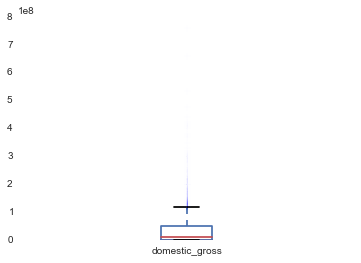

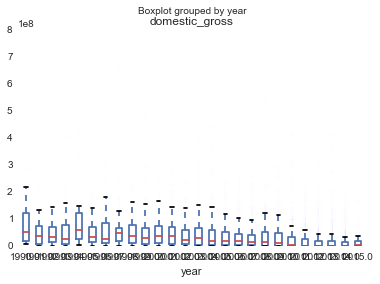

In [36]:
#boxplot = recent_movies.boxplot(column='year')
#boxplot = recent_movies.boxplot(column='domestic_gross')
boxplot = recent_movies.boxplot(column='domestic_gross', by='year')


Ok, this is good but the default size is too small

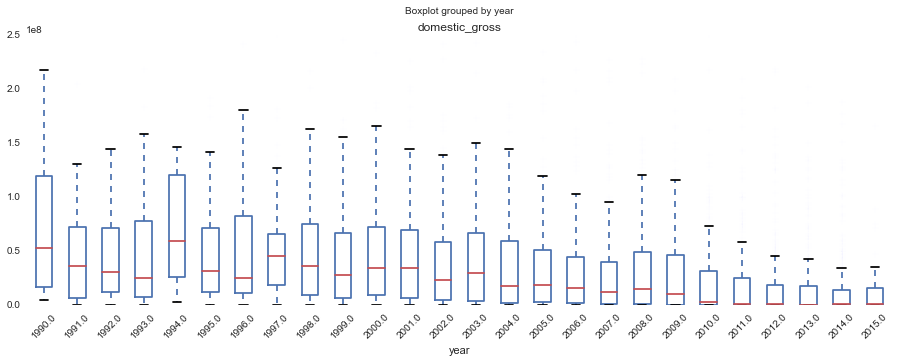

In [37]:
boxplot = recent_movies.boxplot(column='domestic_gross', by='year', 
                                figsize=(15,5), rot=45)
y_range = plt.ylim(0,2.5e8)

In [38]:
movies_df.head()

,alt_title,director,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,widest_release,worldwide_gross,year
0,"10,000 B.C. (2008)",Roland Emmerich,94784201,10000bc,10518,35867488,105000000,None,2008-03-07,"10,000 B.C.",3454,269784201,2008
1,102 Dalmatians (2000),None,66957026,102dalmatians,7353,19883351,85000000,None,2000-11-22,102 Dalmatians,2704,183611771,2000
2,10 Things I Hate About You (1999),None,38178166,10thingsihateaboutyou,3668,8330681,30000000,None,1999-03-31,10 Things I Hate About You,2311,53478166,1999
3,10 Years (2012),Jamie Linden,203373,10years,7569,22707,NaN,None,2012-09-14,10 Years,63,203373,2012
4,11 Flowers (2013),None,9213,11flowers,1758,3516,NaN,None,2013-02-22,11 Flowers,2,NaN,2013


In [39]:
movies_df.describe()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year
count,3.653000e+03,3548.000000,3.548000e+03,1.591000e+03,3576.000000,2.821000e+03,3721.000000
mean,3.587710e+07,7769.070744,8.919290e+06,4.594223e+07,1359.910794,9.117943e+07,2004.740124
std,5.660351e+07,8251.101404,1.403204e+07,4.056849e+07,1293.817347,1.489563e+08,9.127232
min,7.200000e+01,72.000000,7.200000e+01,2.200000e+02,1.000000,7.200000e+01,1933.000000
25%,6.353250e+05,3212.000000,4.748775e+04,1.675000e+07,52.000000,5.710236e+06,2001.000000
50%,1.323532e+07,5520.500000,3.334686e+06,3.500000e+07,1074.500000,3.554776e+07,2007.000000
75%,4.966253e+07,9463.500000,1.268750e+07,6.500000e+07,2584.250000,1.166729e+08,2011.000000
max,7.605076e+08,204230.000000,1.741446e+08,2.150000e+08,4468.000000,2.787965e+09,2015.000000


In [42]:
# how many movies left if we drop ones without budget?
len(movies_df.production_budget.dropna())

1591

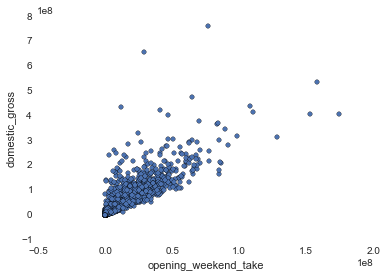

In [43]:
# plot opening weekend vs domestic gross
movies_df.plot(kind='scatter',
               x='opening_weekend_take',
               y='domestic_gross')

In [44]:
movies_df[['domestic_gross', 'opening_weekend_take']].head()

,domestic_gross,opening_weekend_take
0,94784201,35867488
1,66957026,19883351
2,38178166,8330681
3,203373,22707
4,9213,3516


In [45]:
print 'shape for all data:', movies_df.shape

df = movies_df[['domestic_gross', 'opening_weekend_take']]
print 'shape for only our two columns:', df.shape

df = df.dropna()
print 'shape after dropping rows with missing data:', df.shape

shape for all data: (3728, 13)
shape for only our two columns: (3728, 2)
shape after dropping rows with missing data: (3548, 2)


### Let's do a linear regression

In [46]:
import statsmodels.api as sm

Y = df.domestic_gross
X = sm.add_constant(df.opening_weekend_take)

linmodel = sm.OLS(Y, X).fit()



In [47]:
# tell me about yourself, model.
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     9522.
Date:                Tue, 15 Sep 2015   Prob (F-statistic):               0.00
Time:                        16:13:43   Log-Likelihood:                -66088.
No. Observations:                3548   AIC:                         1.322e+05
Df Residuals:                    3546   BIC:                         1.322e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                 5.397e+06   5.92e+05      9.120      0.000      4.24e+06  6.56e+06
opening_weekend_take     3.4734      0.036     97.581      0.000         3.404     3.543
==============================================================================
Omnibus:                     4177.673   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           873313.507
Skew:                           5.909   Prob(JB):                         0.00
Kurtosis:                      78.946   Cond. No.                     1.97e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

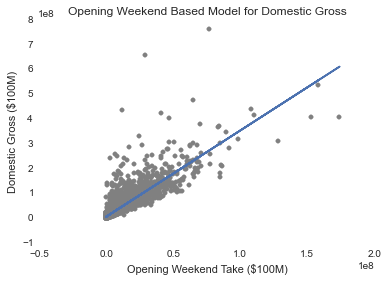

In [48]:
plt.scatter(df.opening_weekend_take, df.domestic_gross,
           color='gray')
predicted_gross = linmodel.predict()
plt.plot(df.opening_weekend_take, predicted_gross)

plt.title("Opening Weekend Based Model for Domestic Gross")
plt.xlabel("Opening Weekend Take ($100M)")
plt.ylabel("Domestic Gross ($100M)")

In [ ]:
# Mean squared error residuals?


In [ ]:


plt.title("Over/Under Prediction of Gross")
plt.xlabel("Actual Domestic Gross ($100M)")
plt.ylabel("Predicted Domestic Gross ($100M)")

In [ ]:



plt.title('log fitted values vs residuals')
plt.xlabel('log fitted values')
plt.ylabel('residuals')

### does log transform help?

In [ ]:
import numpy as np
df = movies_df[['domestic_gross','opening_weekend_take']]



In [ ]:
df.head()

In [ ]:

plt.xlabel('log(opening weekend)')
plt.ylabel('log(domestic gross)')

In [ ]:
# MODEL IT


In [ ]:
def residual_plot(model):
    ???
    
residual_plot(linmodel_logs)

In [ ]:
movies_df['opening_week2'] = ???
movies_df['log_domestic_gross'] = ???
movies_df['log_opening_weekend'] = ???
movies_df['log_opening_weekend2'] = ???

columns = ['domestic_gross','log_domestic_gross','opening_weekend_take',
           'opening_week2','log_opening_weekend','log_opening_weekend2']

polydf = movies_df[columns].dropna()
polydf.head()

In [ ]:
import statsmodels.formula.api as smf

formula = ???
quadmodel = ???
quadmodel.summary()

In [ ]:
residual_plot(quadmodel)

As soon as we have a more solid understanding of how to evaluate/compare different models, this process is figuring out the right model form: Which features, in what functional shapes, interacting how?